#Carga de librerías y funciones

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import seaborn as sns
import glob

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids

# for everything else
import os

from random import randint
#import pickle

from numpy import genfromtxt

In [28]:
from random import sample
from  sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

#Carga lista de archivos

In [118]:
lista_archivos=glob.glob(r"C:\Users\tiama\OneDrive\Documentos\Maestría en minería y exploración de datos\Minería de datos aplicada a ciencia y tecnología\TP1\Rice_Image_Dataset/**/*.jpg", recursive = True)

In [ ]:
#lista_archivos=sample(lista_archivos_total, 5000)

In [ ]:
len(lista_archivos)

75000

In [119]:
df=pd.DataFrame({"Archivo":lista_archivos})

In [120]:
df["label"]=np.where(df.Archivo.str.contains("Arborio"),"Arborio",None)
df["label"]=np.where(df.Archivo.str.contains("Basmati"),"Basmati",df["label"])
df["label"]=np.where(df.Archivo.str.contains("Ipsala"),"Ipsala",df["label"])
df["label"]=np.where(df.Archivo.str.contains("Jasmine"),"Jasmine",df["label"])
df["label"]=np.where(df.Archivo.str.contains("Karacadag"),"Karacadag",df["label"])

In [ ]:
df.label.value_counts().sort_index()

Arborio      15000
Basmati      15000
Ipsala       15000
Jasmine      15000
Karacadag    15000
Name: label, dtype: int64

In [121]:
df=df[df["label"].str.match( "Karacadag|Jasmine|Ipsala")]

In [ ]:
df

Archivo      label
30000  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...     Ipsala
30001  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...     Ipsala
30002  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...     Ipsala
30003  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...     Ipsala
30004  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...     Ipsala
...                                                  ...        ...
74995  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...  Karacadag
74996  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...  Karacadag
74997  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...  Karacadag
74998  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...  Karacadag
74999  C:\Users\Marie\Documents\MasterUBA\DMcyt\tp1\a...  Karacadag

[45000 rows x 2 columns]

In [ ]:
df.label.value_counts()

Ipsala       15000
Jasmine      15000
Karacadag    15000
Name: label, dtype: int64

#Cargar features

In [122]:
names_pd = pd.read_csv(r'C:\Users\tiama\OneDrive\Documentos\Maestría en minería y exploración de datos\Minería de datos aplicada a ciencia y tecnología\TP1\names_pd.csv', index_col=0)

In [123]:
names = names_pd.to_numpy()

In [124]:
feat_pd = pd.read_csv(r"C:\Users\tiama\OneDrive\Documentos\Maestría en minería y exploración de datos\Minería de datos aplicada a ciencia y tecnología\TP1\feat_pd.csv", index_col=0)

In [125]:
feat_pd=feat_pd.iloc[df.index]

In [126]:
feat = feat_pd.to_numpy()

In [ ]:
feat.shape

(45000, 4096)

In [127]:
label = df['label'].tolist()
unique_labels = list(set(label))

In [128]:
X_train, X_test, y_train, y_test = train_test_split( feat, df, test_size=0.0666666666666, random_state=42, stratify=df.label)

In [129]:
feat = X_test
df = y_test

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22) # 
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
x.shape

(45000, 100)

In [ ]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


#Normalizaciones

In [130]:
scaler = MinMaxScaler()
feat2 = scaler.fit_transform(feat)

In [131]:
scaler = StandardScaler()
feat3 = scaler.fit_transform(feat)

# PAM PCA 'euclidean'

In [ ]:
KM_meta=KMedoids(n_clusters=3,metric='euclidean',init='k-medoids++').fit(x)


In [ ]:
KM_meta.labels_

array([0, 1, 0, ..., 3, 3, 3])

In [ ]:
df_conf = df.copy()
df_conf["Kmedoids_x"] = KM_meta.labels_
df_conf=df_conf[["label", "Kmedoids_x"]]

In [ ]:
confusion=pd.crosstab(df_conf["label"], df_conf["Kmedoids_x"])
confusion

Kmedoids_x    0    1    2
label                    
Ipsala       41   38  921
Jasmine     965    3   32
Karacadag     3  988    9

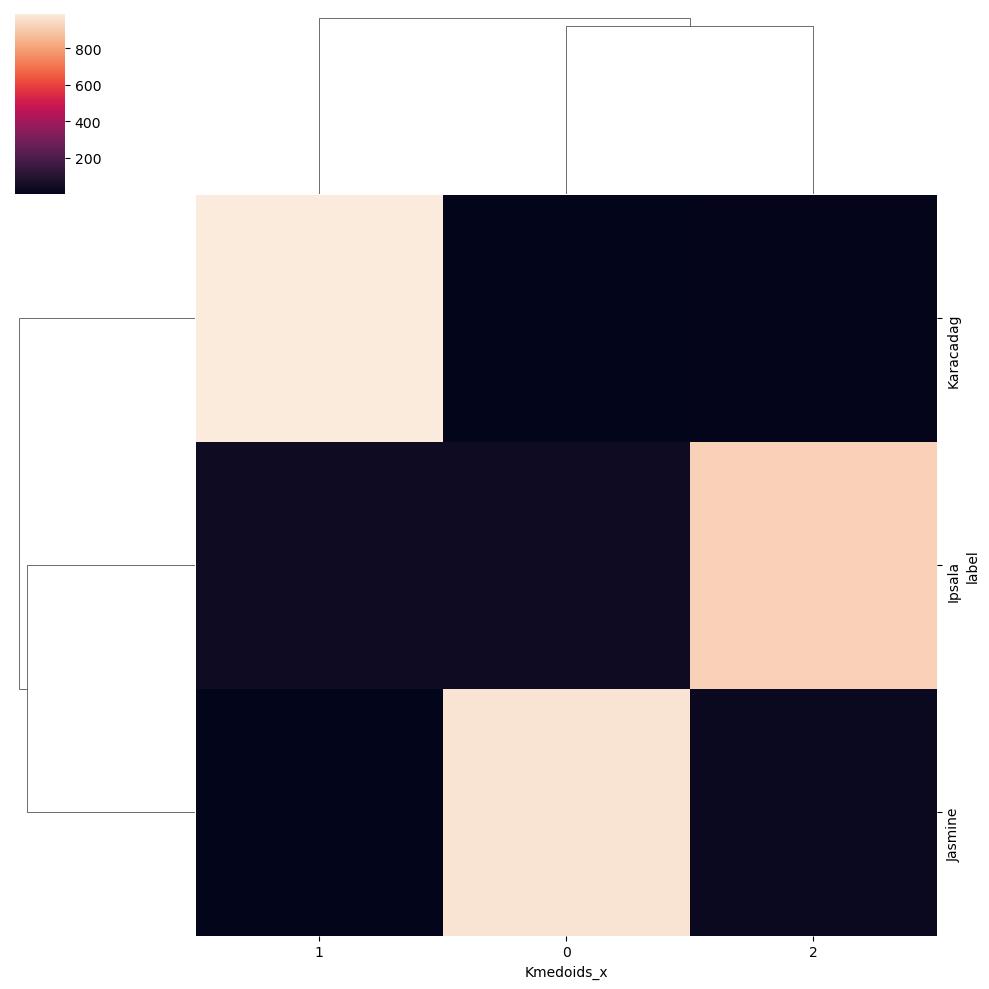

In [ ]:
sns.clustermap(confusion)

In [ ]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [ ]:
print(vanDongen(confusion))

0.06346008562075044


In [ ]:
from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(df["label"],KM_meta.labels_)) ##probar con label encodeadas a numeros

0.8792808272592816


In [ ]:
silhouette_score(x, KM_meta.labels_)

0.18971520174960316

In [ ]:
kmeans.inertia_

65592463.344028175

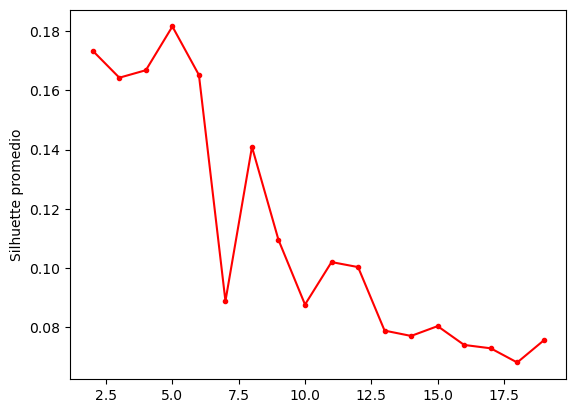

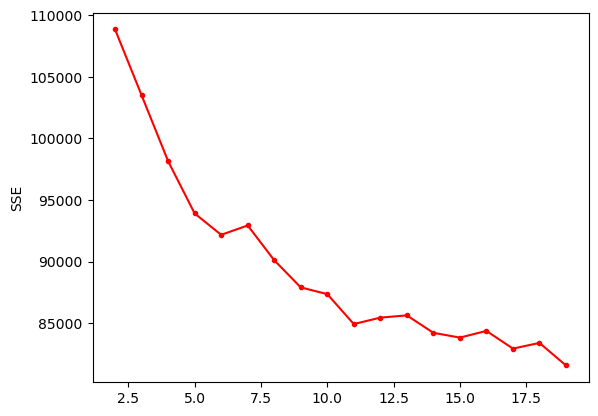

In [ ]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='euclidean',init='k-medoids++').fit(x)

    silh.append(silhouette_score(x, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

# PAM feat default

##Buscando el óptimo

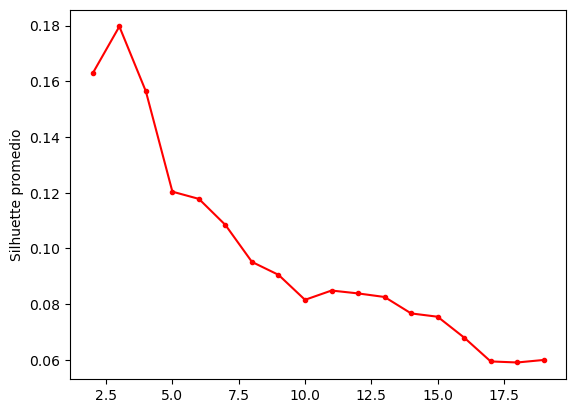

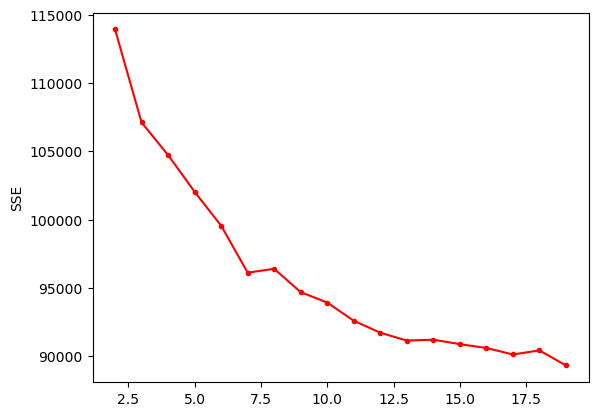

In [44]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='euclidean',init='k-medoids++', random_state= 777).fit(feat)

    silh.append(silhouette_score(feat, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [134]:
KM = KMedoids(n_clusters=3,metric='euclidean',init='k-medoids++', random_state=777).fit(feat)

In [135]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [136]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1    2
label                   
Ipsala      37   25  938
Jasmine      5  986    9
Karacadag  979    3   18

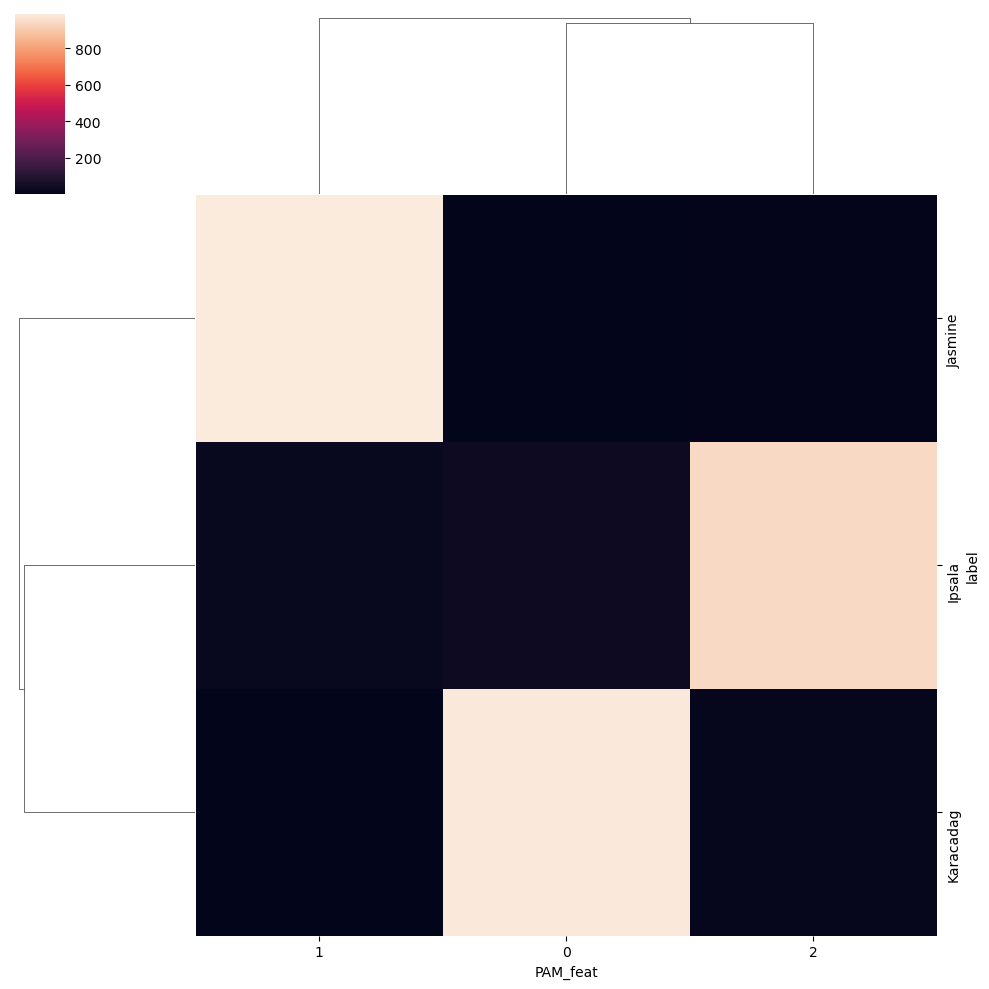

In [137]:
sns.clustermap(confusion)

In [138]:
print(vanDongen(confusion))

0.04875596883639105


In [139]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.905943388600587


In [140]:
silhouette_score(feat, KM.labels_)

0.1796655521626418

In [141]:
KM.inertia_

107114.01452728265

In [142]:
pca = PCA()
scores = pca.fit_transform(feat)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

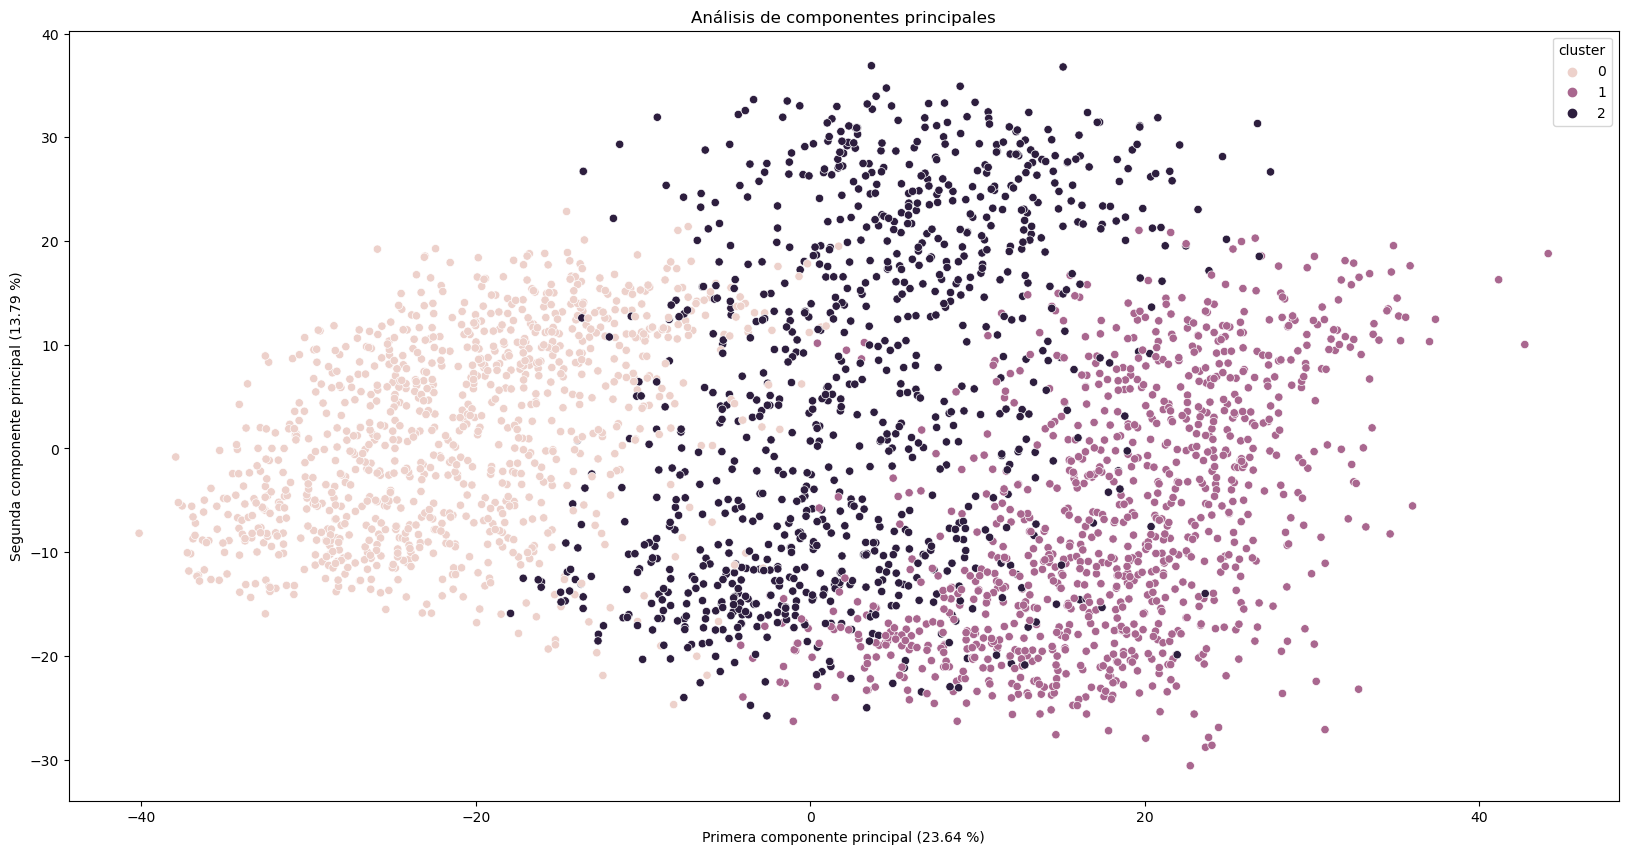

In [143]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat escalado

##Buscando el óptimo

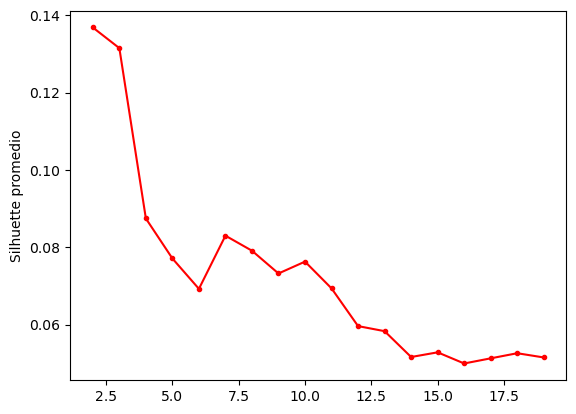

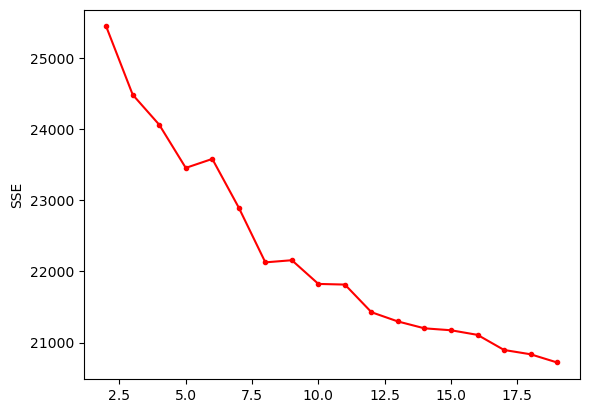

In [57]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='euclidean',init='k-medoids++', random_state= 777).fit(feat2)

    silh.append(silhouette_score(feat2, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [144]:
KM = KMedoids(n_clusters=2,metric='euclidean',init='k-medoids++', random_state= 777).fit(feat2)

In [145]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [146]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1
label              
Ipsala     329  671
Jasmine      1  999
Karacadag  998    2

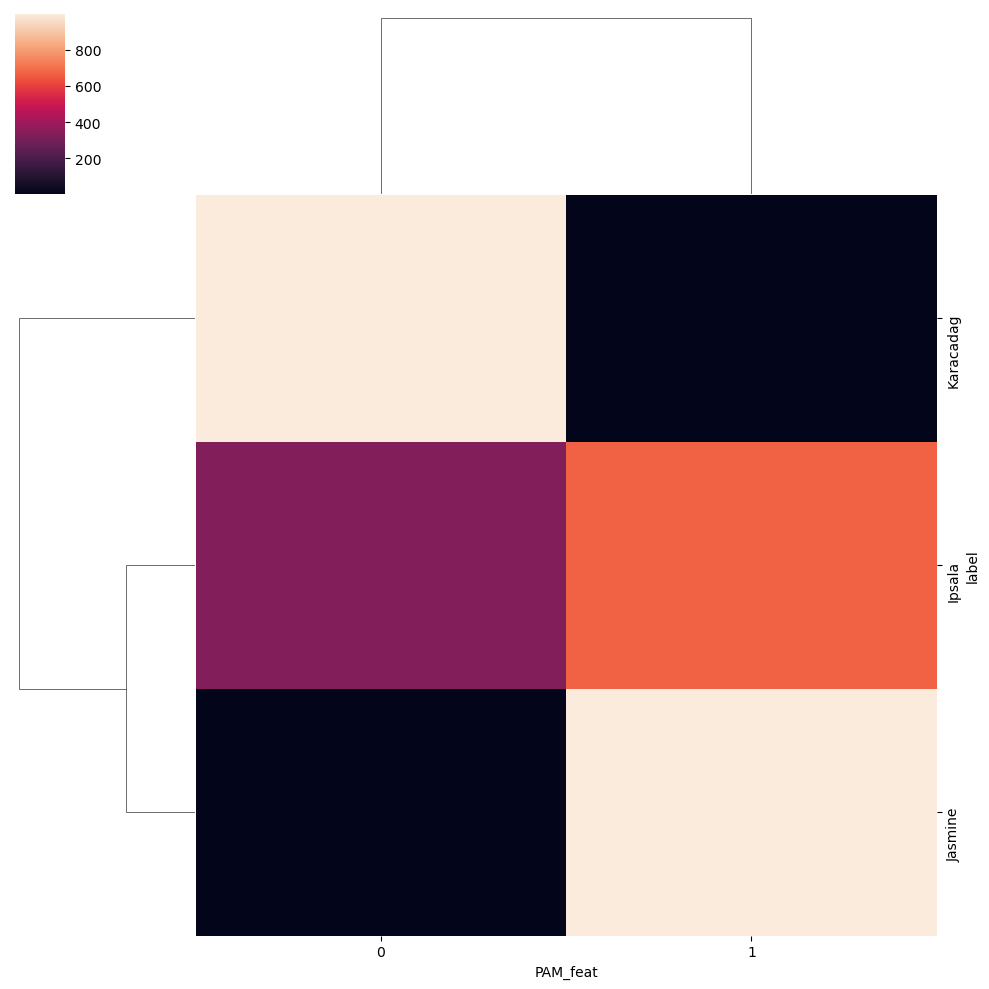

In [147]:
sns.clustermap(confusion)

In [148]:
print(vanDongen(confusion))

0.4011418269230769


In [149]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.45676832039371096


In [150]:
silhouette_score(feat2, KM.labels_)

0.13681654977605673

In [151]:
KM.inertia_

25447.756519799972

In [152]:
pca = PCA()
scores = pca.fit_transform(feat2)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

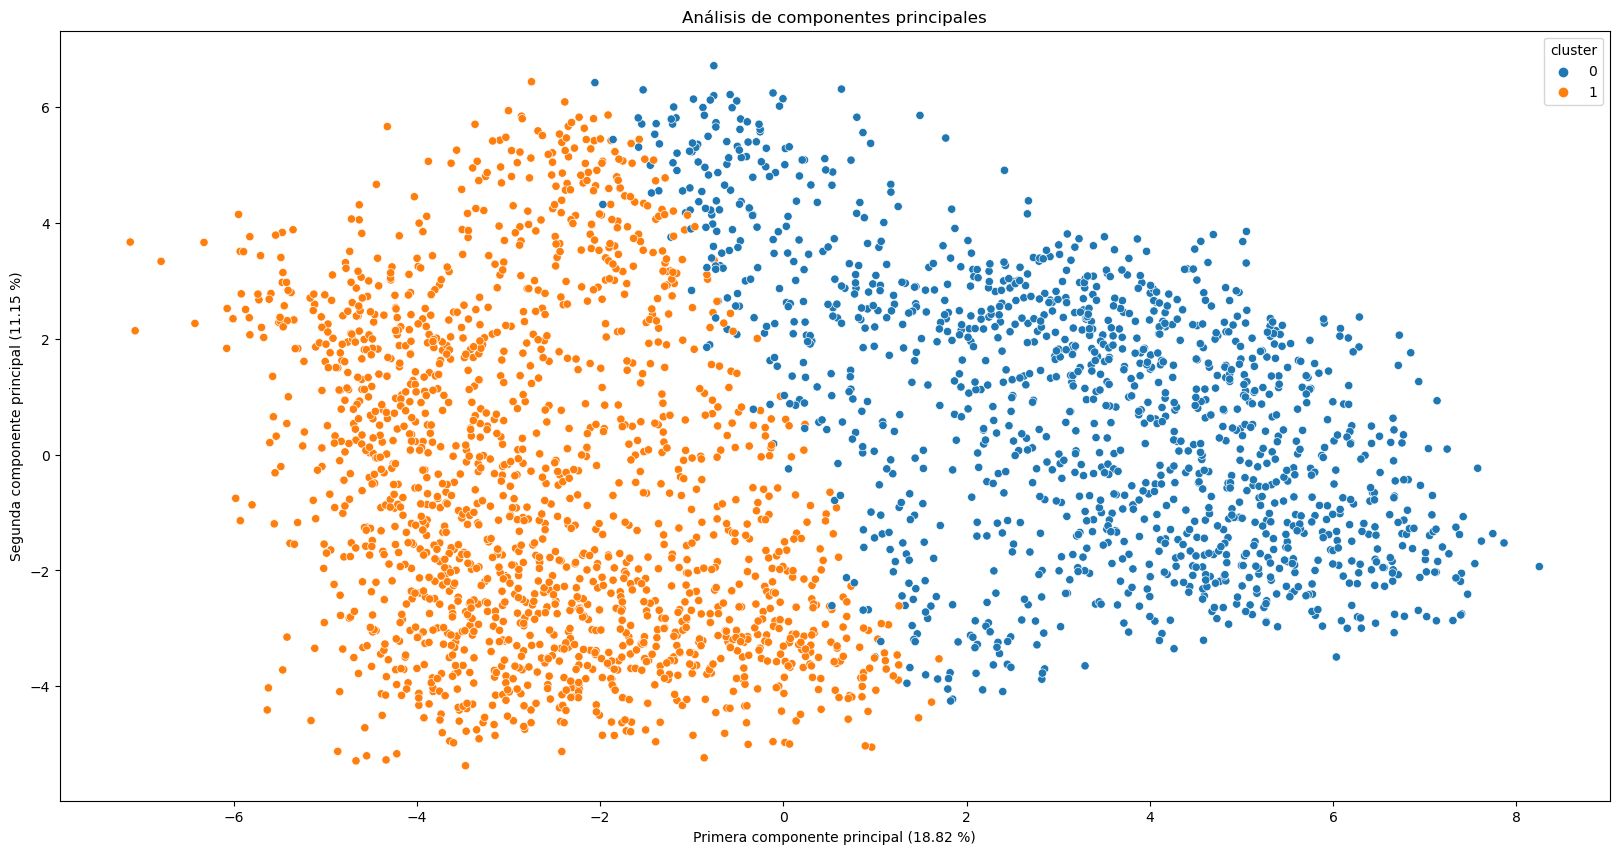

In [153]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat normalizado

##Buscando el óptimo

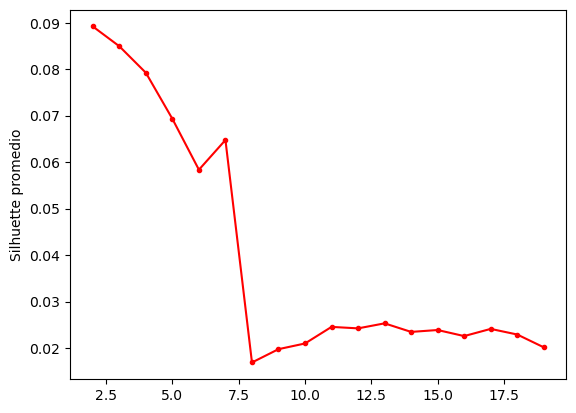

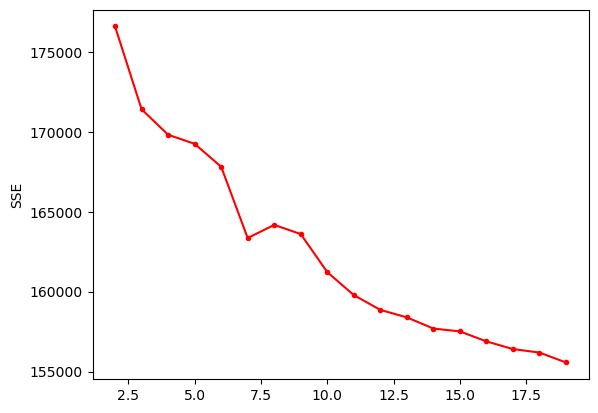

In [78]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='euclidean',init='k-medoids++', random_state= 777).fit(feat3)

    silh.append(silhouette_score(feat3, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [154]:
KM = KMedoids(n_clusters=2,metric='euclidean',init='k-medoids++', random_state= 777).fit(feat3)

In [155]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [156]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1
label              
Ipsala     264  736
Jasmine      1  999
Karacadag  990   10

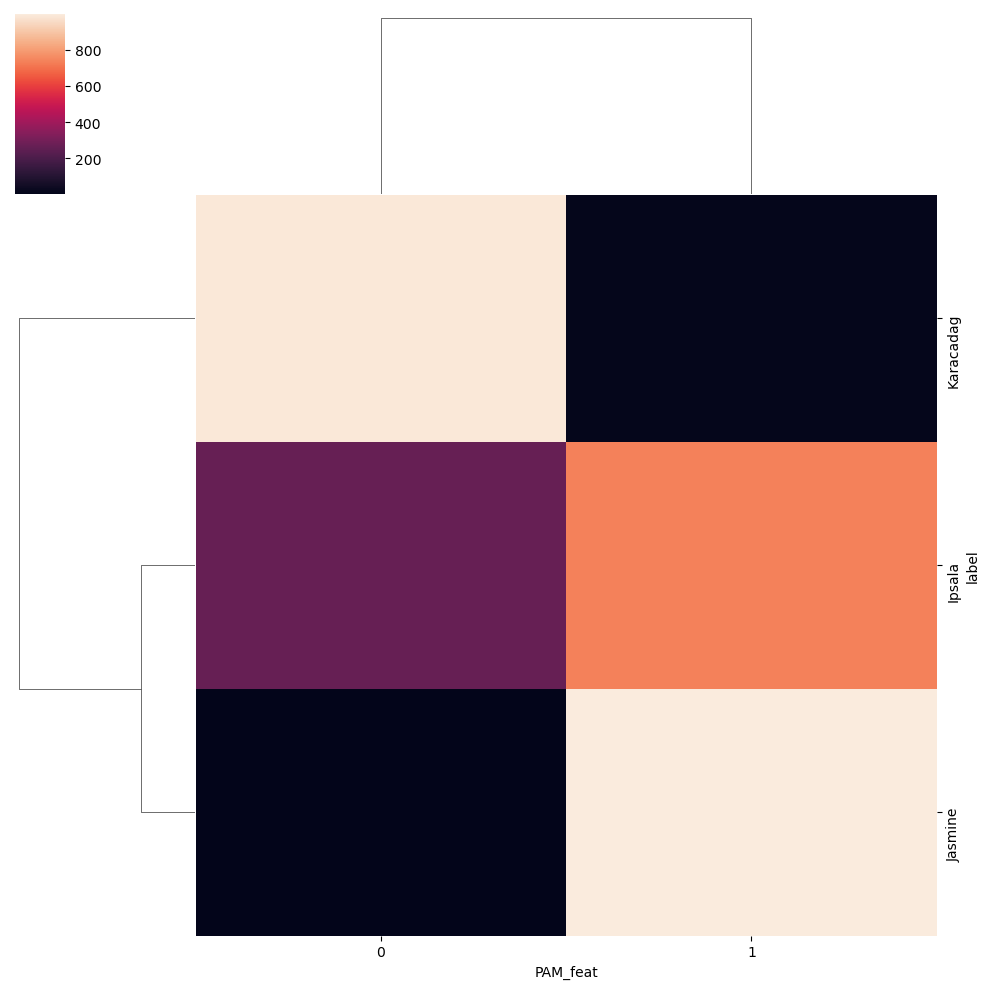

In [157]:
sns.clustermap(confusion)

In [158]:
print(vanDongen(confusion))

0.39508448540706603


In [159]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.4621364727354283


In [160]:
silhouette_score(feat3, KM.labels_)

0.08918854962852428

In [161]:
KM.inertia_

176581.47597124064

In [162]:
pca = PCA()
scores = pca.fit_transform(feat3)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

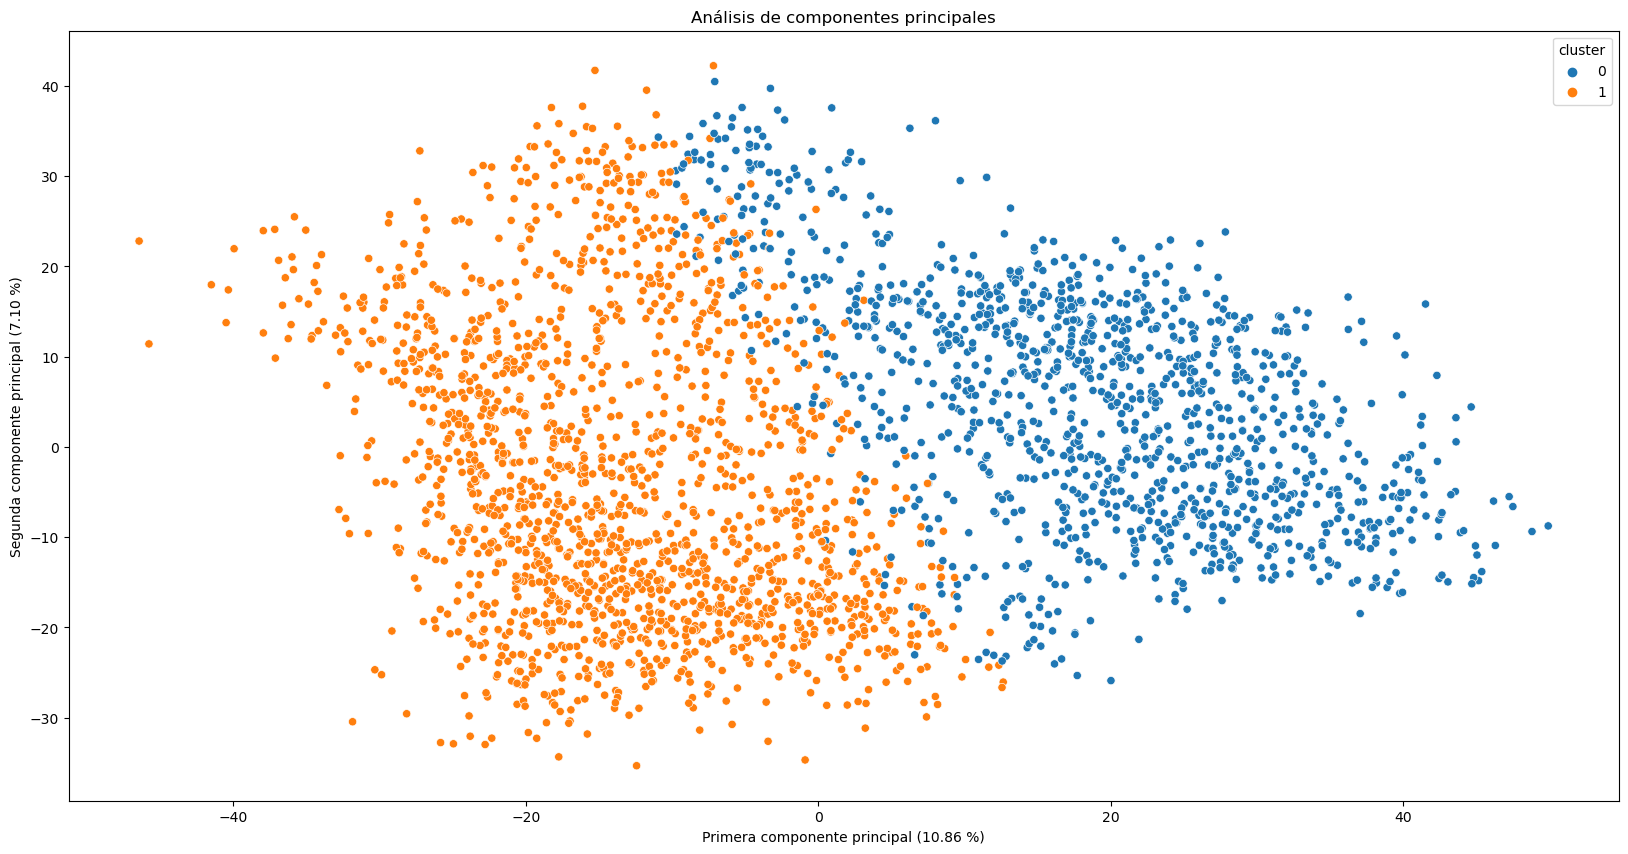

In [163]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat default (Cityblock)

##Buscando el óptimo

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


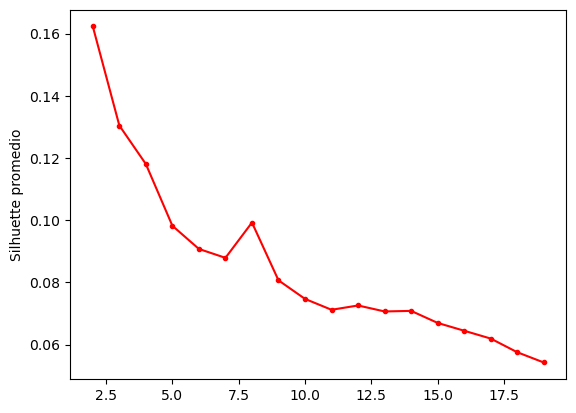

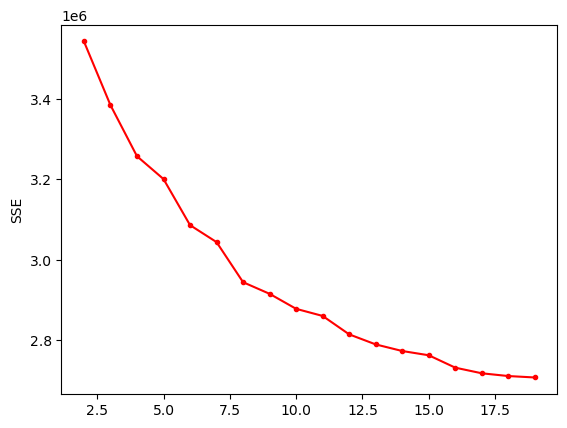

In [88]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cityblock',init='k-medoids++', random_state= 777).fit(feat)
    print(k)
    silh.append(silhouette_score(feat, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [97]:
KM = KMedoids(n_clusters=2,metric='cityblock',init='k-medoids++', random_state=777).fit(feat)

In [98]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [99]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1
label              
Ipsala     471  529
Jasmine    997    3
Karacadag   10  990

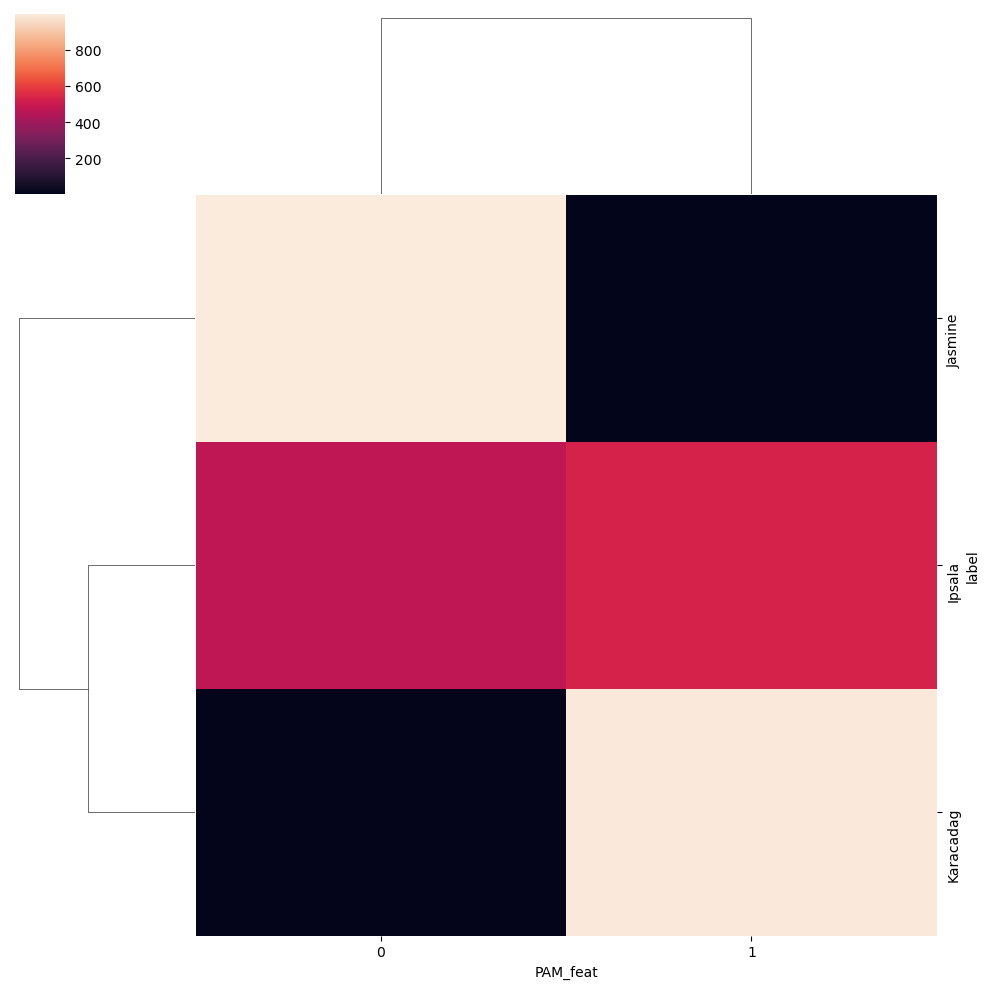

In [100]:
sns.clustermap(confusion)

In [101]:
print(vanDongen(confusion))

0.43041978148361126


In [102]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.433306962853984


In [103]:
silhouette_score(feat, KM.labels_)

0.16229418738717738

In [104]:
KM.inertia_

3541902.3243197664

In [105]:
pca = PCA()
scores = pca.fit_transform(feat)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

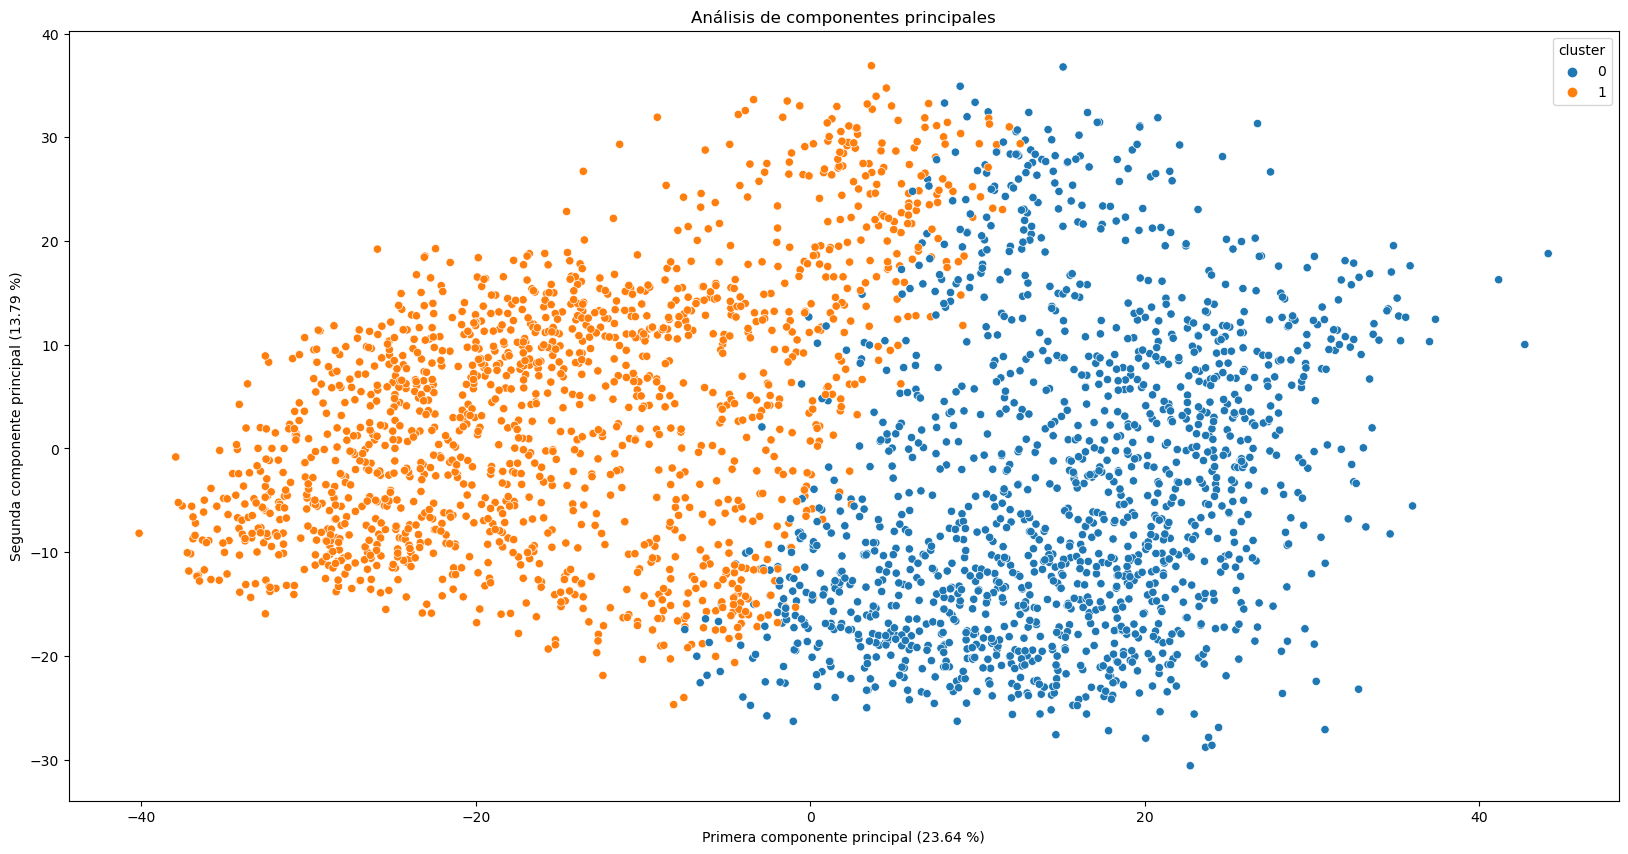

In [106]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat escalado (Cityblock)

##Buscando el óptimo

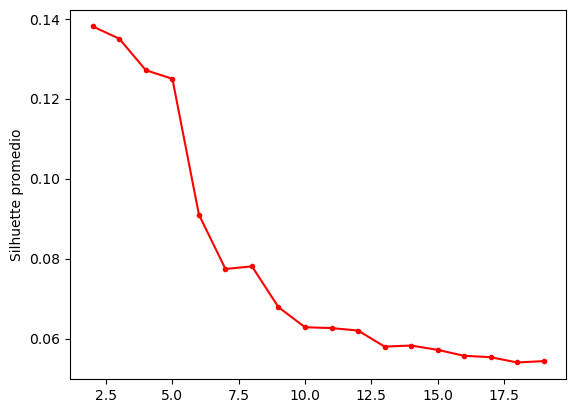

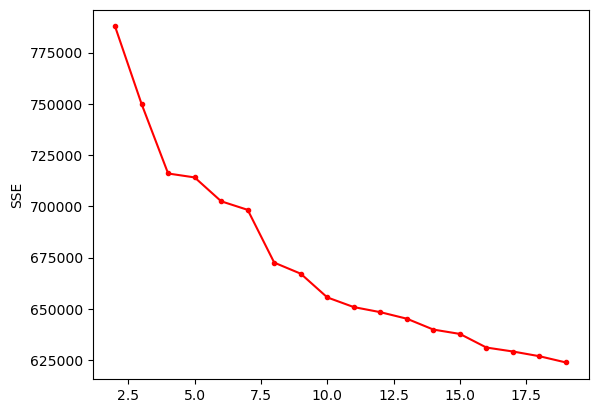

In [164]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cityblock',init='k-medoids++', random_state= 777).fit(feat2)

    silh.append(silhouette_score(feat2, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [165]:
KM = KMedoids(n_clusters=2,metric='cityblock',init='k-medoids++', random_state= 777).fit(feat2)

In [166]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [167]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1
label              
Ipsala     274  726
Jasmine      1  999
Karacadag  996    4

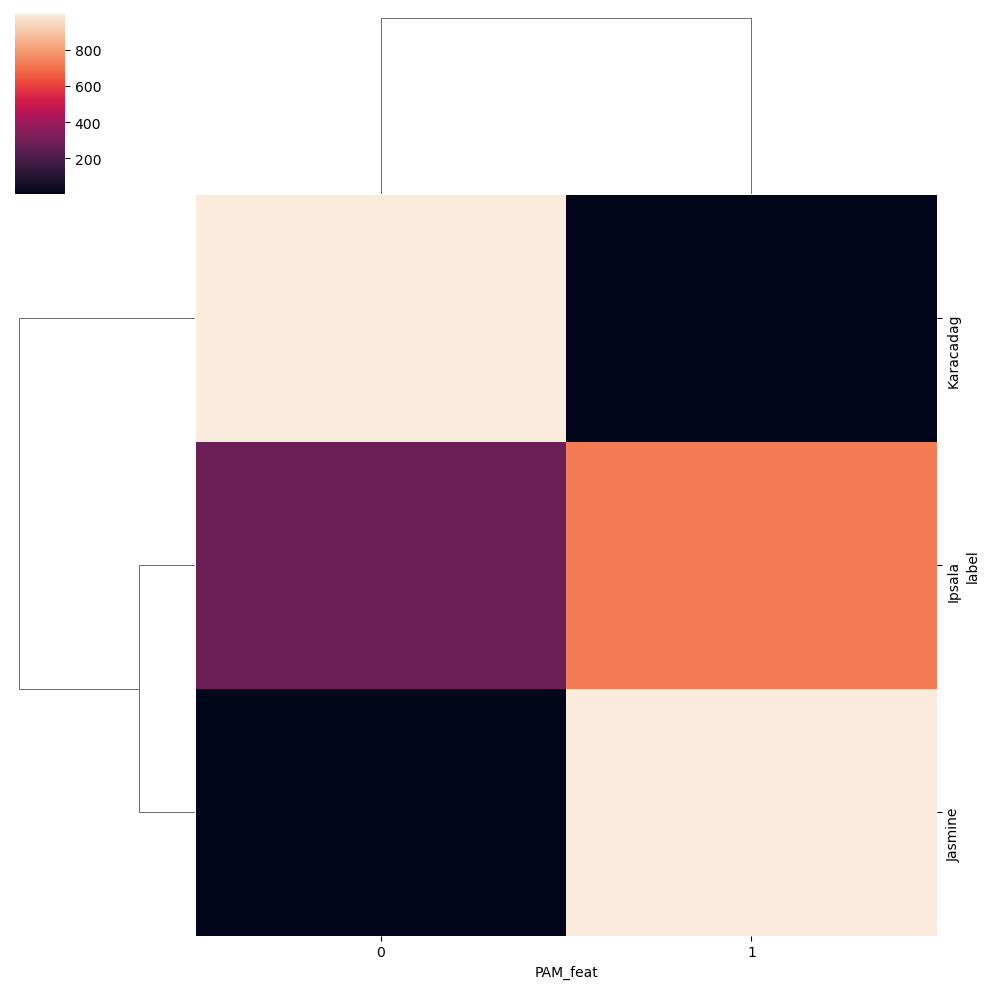

In [168]:
sns.clustermap(confusion)

In [169]:
print(vanDongen(confusion))

0.3925405074900642


In [170]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.46602548864043253


In [171]:
silhouette_score(feat2, KM.labels_)

0.1380550692083479

In [172]:
KM.inertia_

787787.3103530005

In [173]:
pca = PCA()
scores = pca.fit_transform(feat2)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

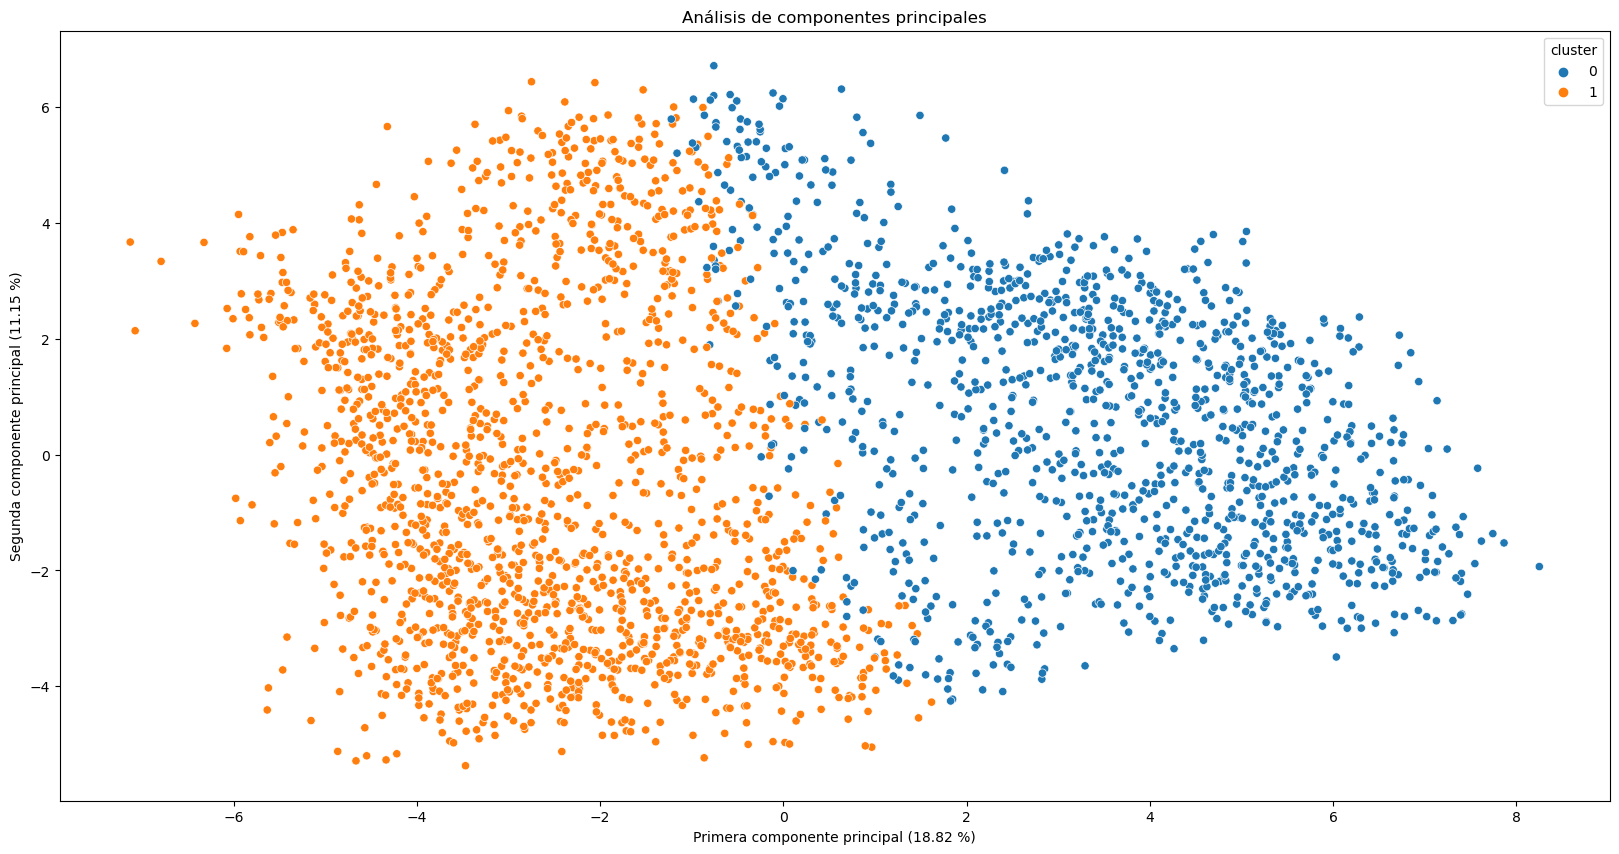

In [174]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat normalizado (Cityblock)

##Buscando el óptimo

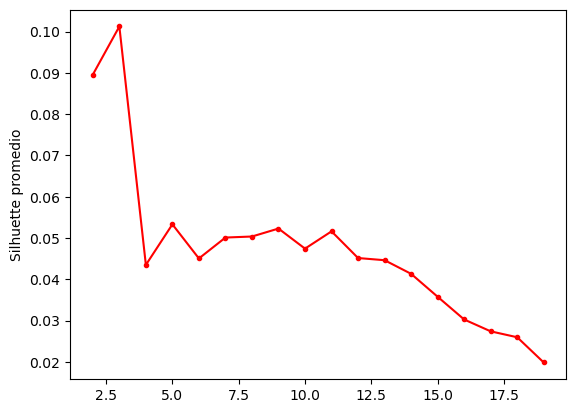

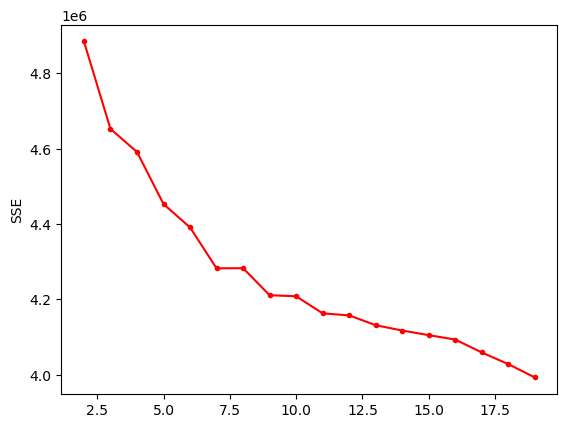

In [175]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cityblock',init='k-medoids++', random_state= 777).fit(feat3)

    silh.append(silhouette_score(feat3, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [176]:
KM = KMedoids(n_clusters=3,metric='cityblock',init='k-medoids++', random_state= 777).fit(feat3)

In [177]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [178]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1    2
label                   
Ipsala     146  392  462
Jasmine      1  983   16
Karacadag  992    4    4

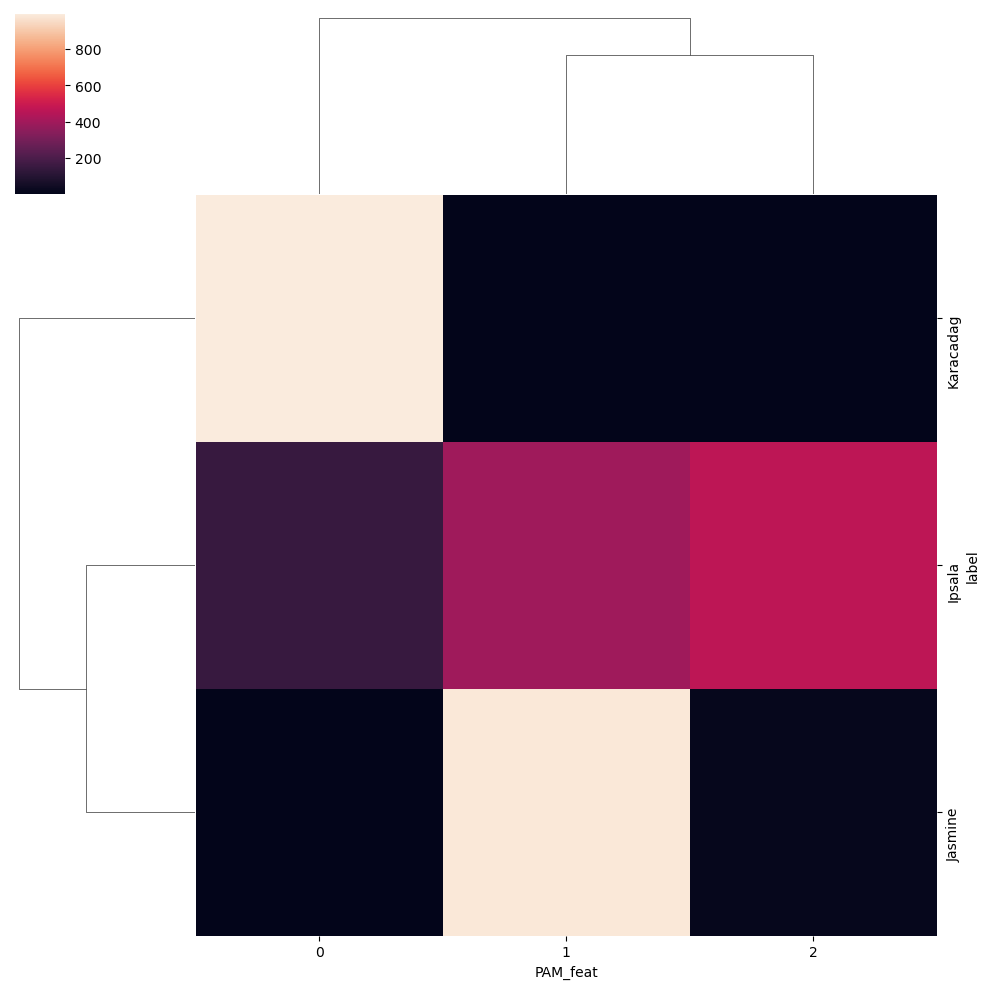

In [179]:
sns.clustermap(confusion)

In [180]:
print(vanDongen(confusion))

0.31096382214857776


In [181]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.5766643696530276


In [182]:
silhouette_score(feat3, KM.labels_)

0.10125421008696969

In [183]:
KM.inertia_

4652528.849399159

In [184]:
pca = PCA()
scores = pca.fit_transform(feat3)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

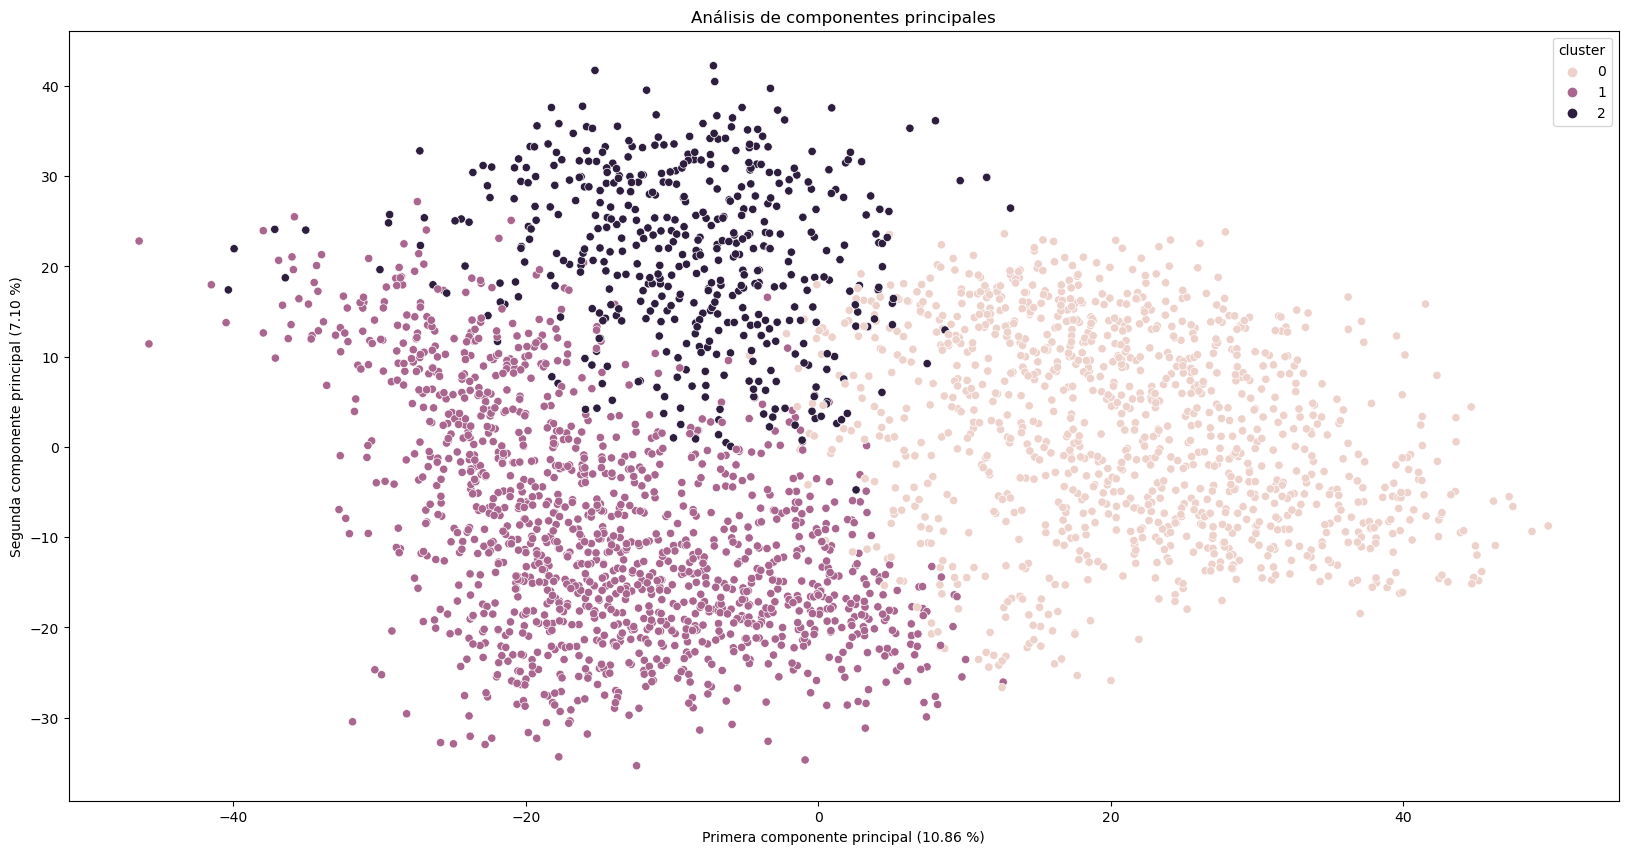

In [185]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat default (Cosine)

##Buscando el óptimo

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


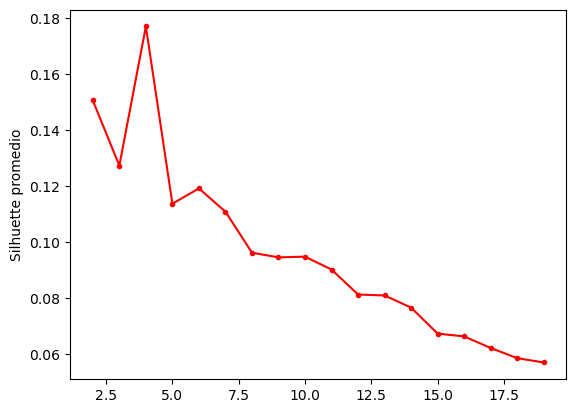

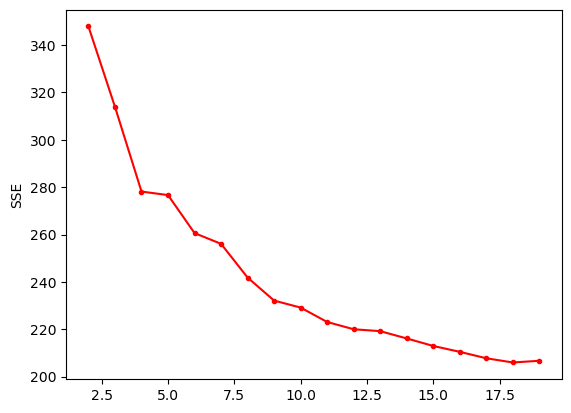

In [186]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cosine',init='k-medoids++', random_state= 777).fit(feat)
    print(k)
    silh.append(silhouette_score(feat, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [187]:
KM = KMedoids(n_clusters=4,metric='cosine',init='k-medoids++', random_state=777).fit(feat)

In [188]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [189]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1    2    3
label                        
Ipsala     520   14    4  462
Jasmine     32  887    0   81
Karacadag   36    2  956    6

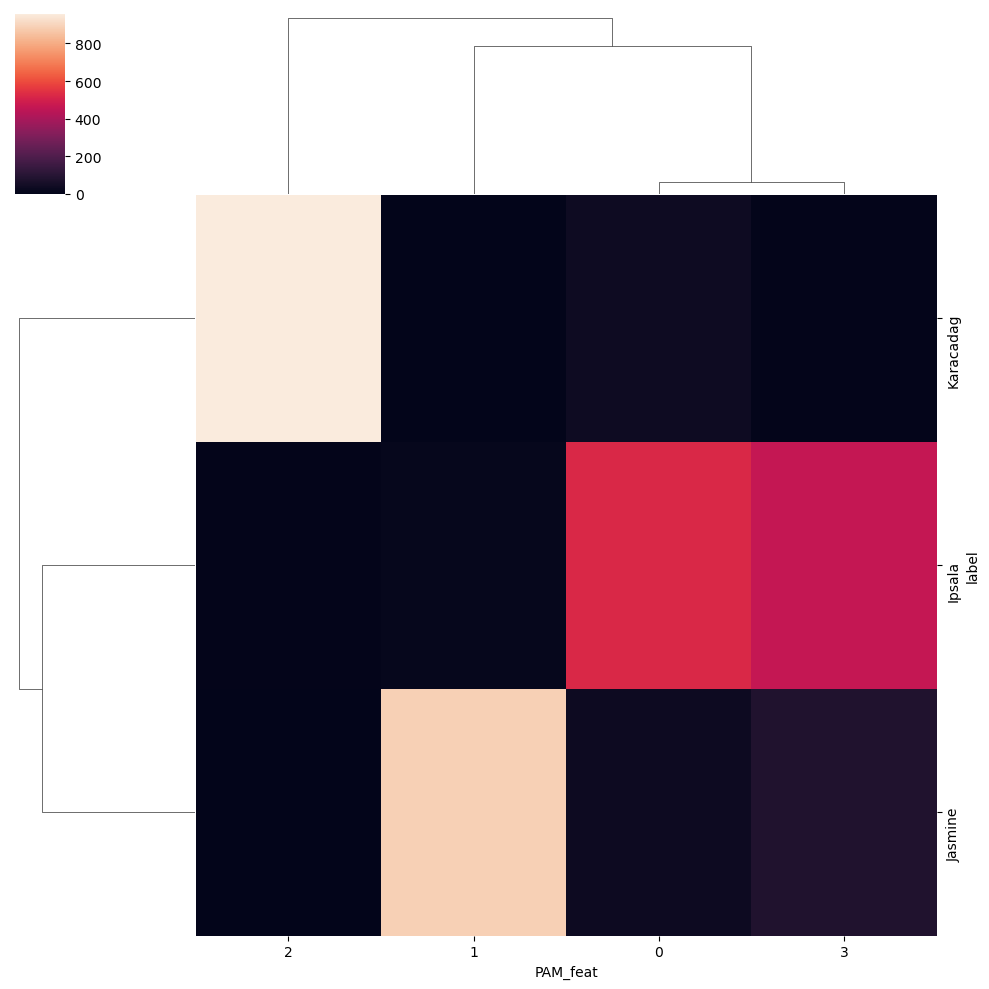

In [190]:
sns.clustermap(confusion)

In [191]:
print(vanDongen(confusion))

0.200990099009901


In [192]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.7371179545355989


In [193]:
silhouette_score(feat, KM.labels_)

0.1770921885559023

In [194]:
KM.inertia_

278.1536832974831

In [195]:
pca = PCA()
scores = pca.fit_transform(feat)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

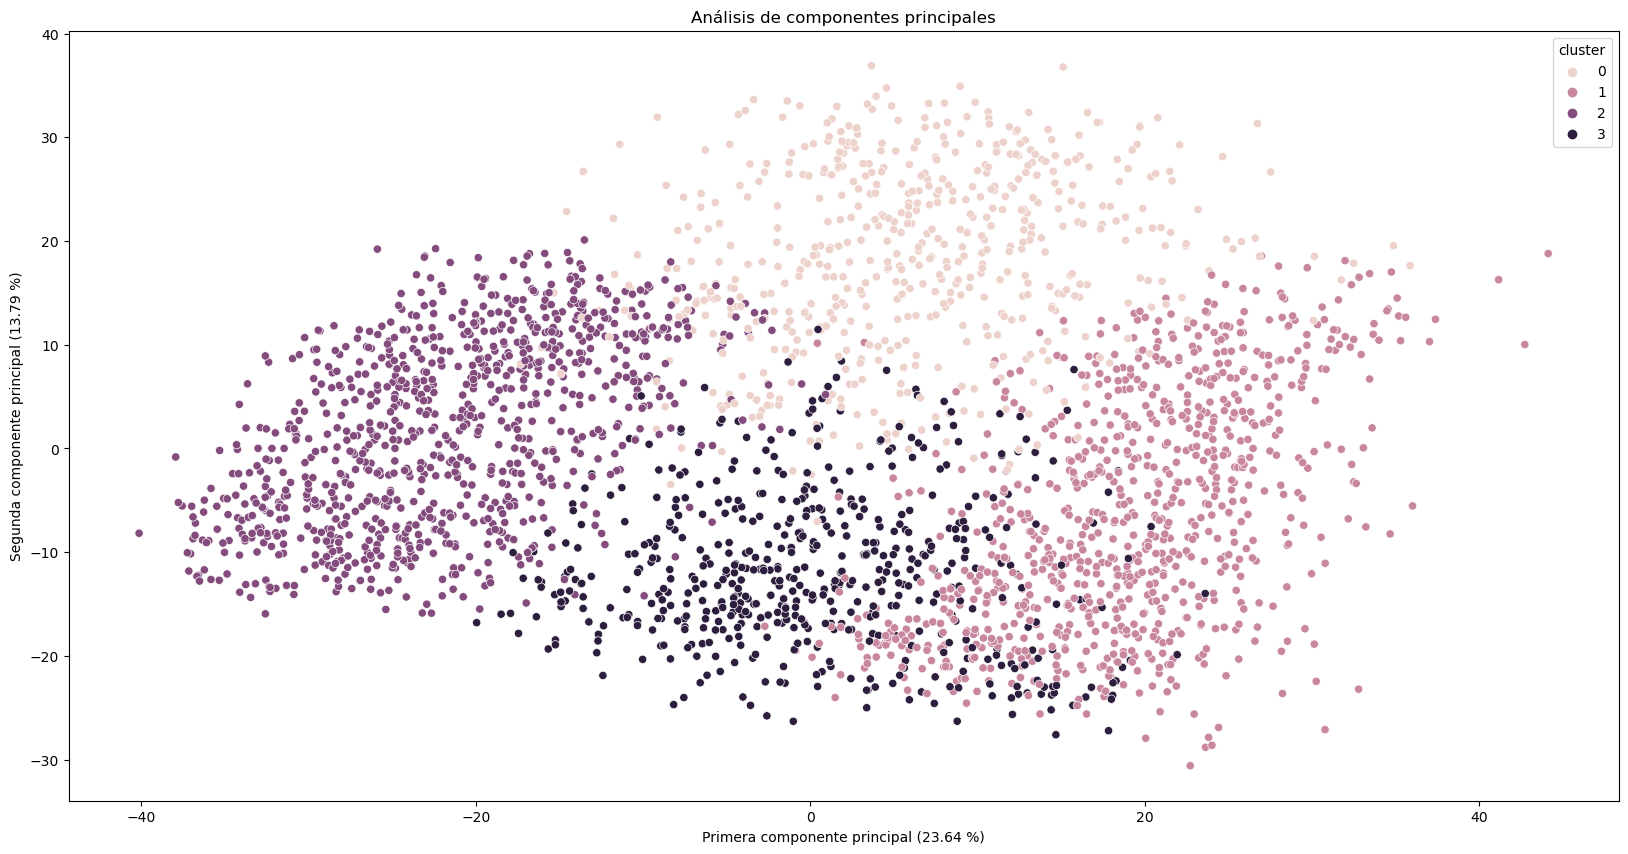

In [196]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat escalado (Cosine)

##Buscando el óptimo

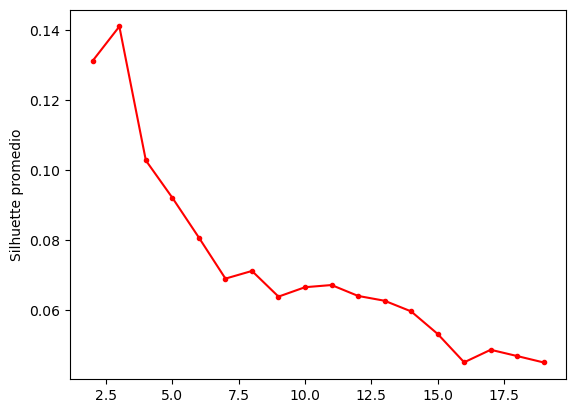

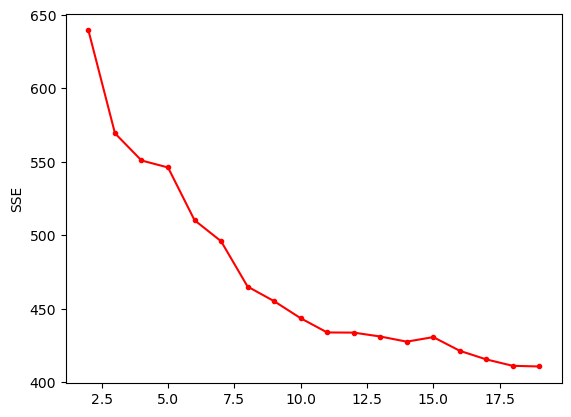

In [197]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cosine',init='k-medoids++', random_state= 777).fit(feat2)

    silh.append(silhouette_score(feat2, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [198]:
KM = KMedoids(n_clusters=3,metric='cosine',init='k-medoids++', random_state= 777).fit(feat2)

In [199]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [200]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1    2
label                   
Ipsala     617  196  187
Jasmine     16    4  980
Karacadag   51  948    1

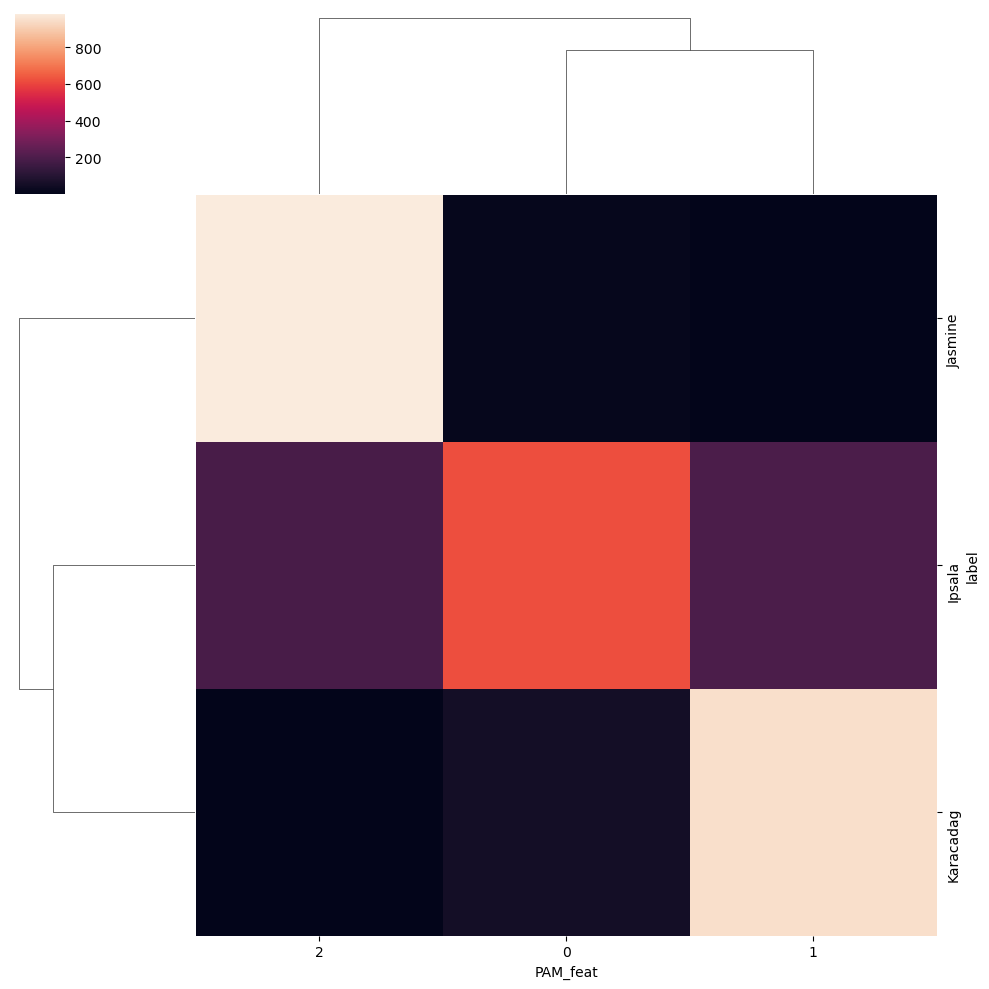

In [201]:
sns.clustermap(confusion)

In [202]:
print(vanDongen(confusion))

0.23747390396659707


In [203]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.6249734822502022


In [204]:
silhouette_score(feat2, KM.labels_)

0.14104209620354052

In [205]:
KM.inertia_

569.4539652776701

In [206]:
pca = PCA()
scores = pca.fit_transform(feat2)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

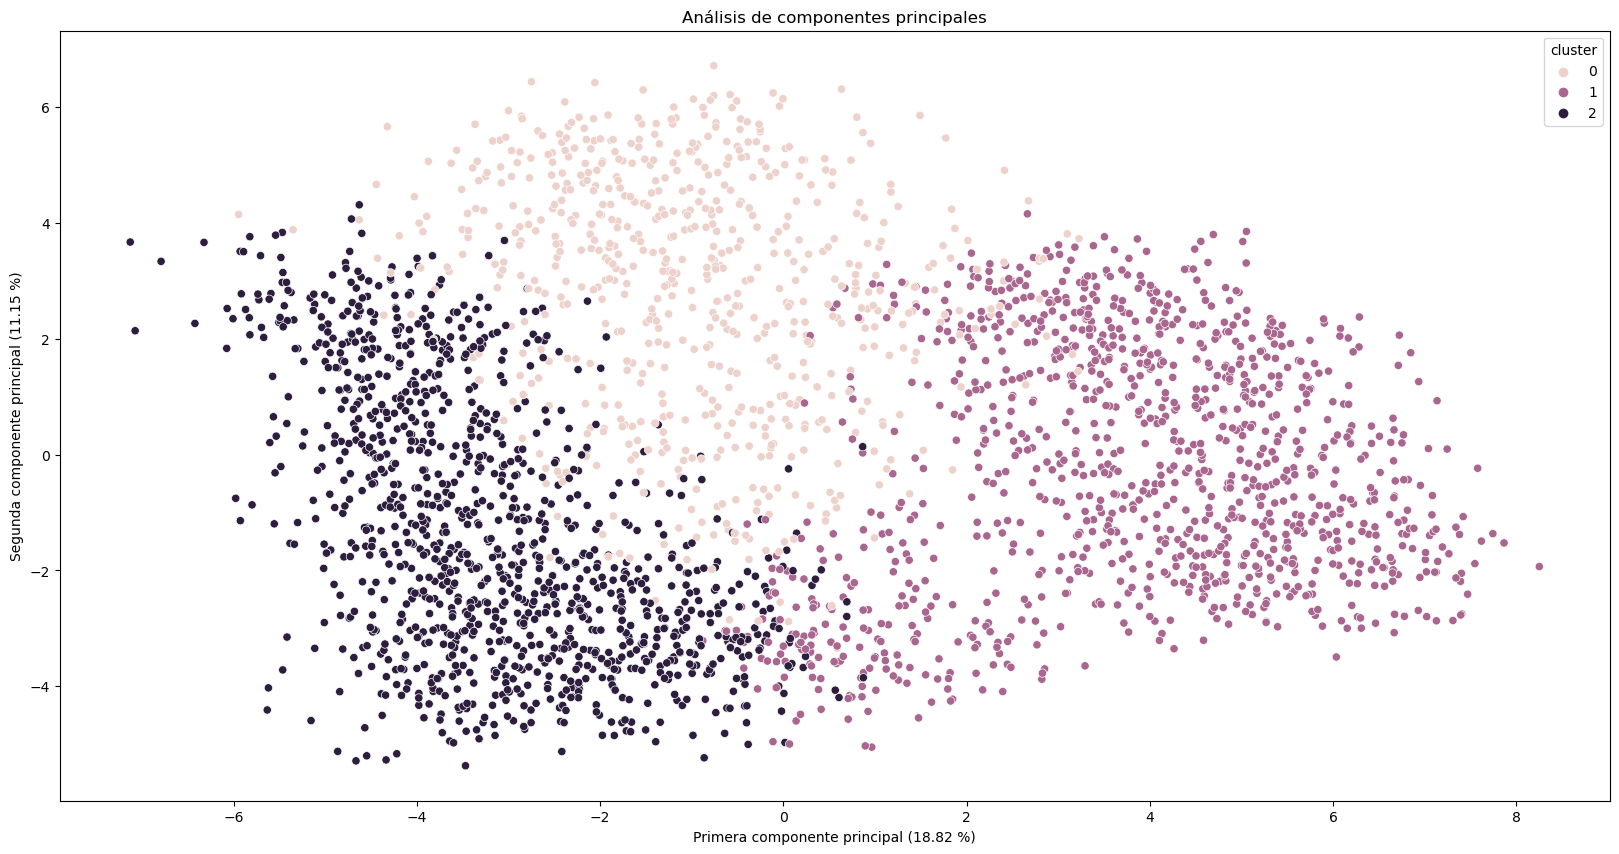

In [207]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));

# PAM feat normalizado (Cosine)

##Buscando el óptimo

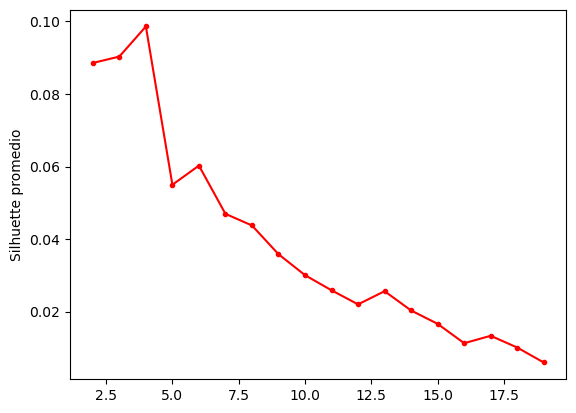

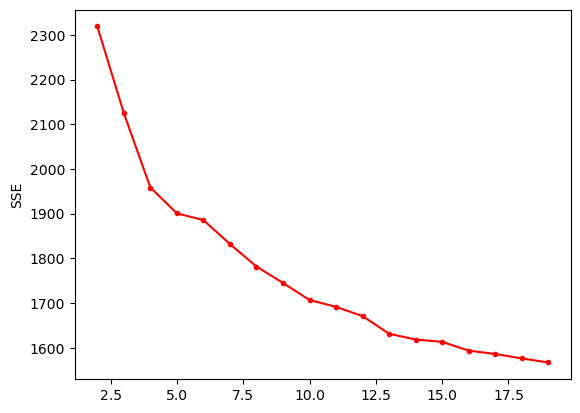

In [208]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
    KM = KMedoids(n_clusters=k,metric='cosine',init='k-medoids++', random_state= 777).fit(feat3)

    silh.append(silhouette_score(feat3, KM.labels_)) #, metric='precomputed'
    sse.append(KM.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

##PAM óptimo

In [209]:
KM = KMedoids(n_clusters=4,metric='cosine',init='k-medoids++', random_state= 777).fit(feat3)

In [210]:
df_conf = df.copy()
df_conf["PAM_feat"] = KM.labels_
df_conf=df_conf[["label", "PAM_feat"]]

In [211]:
confusion=pd.crosstab(df_conf["label"], df_conf["PAM_feat"])
confusion

PAM_feat     0    1    2    3
label                        
Ipsala      16  543  428   13
Jasmine      0   38  209  753
Karacadag  985    5    5    5

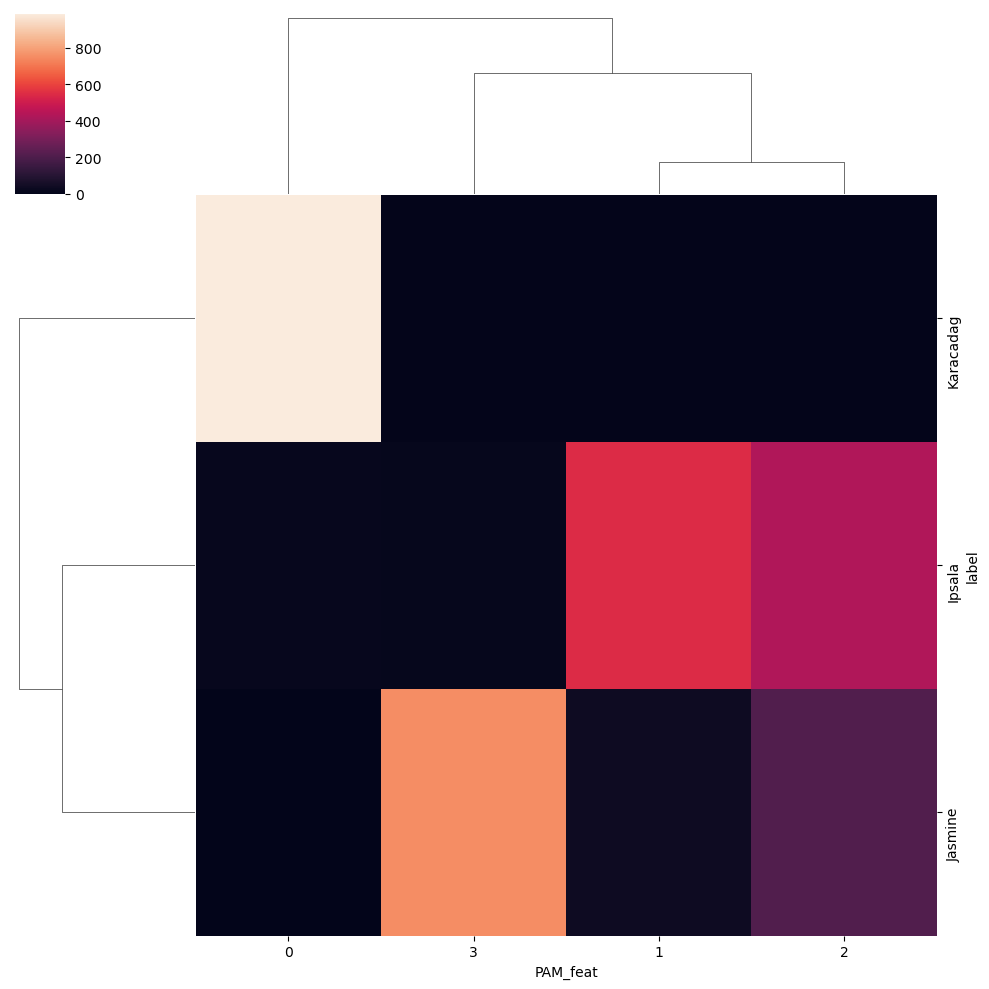

In [212]:
sns.clustermap(confusion)

In [213]:
print(vanDongen(confusion))

0.2525631407851963


In [214]:
print(adjusted_rand_score(df["label"],KM.labels_)) 

0.6746354526590077


In [215]:
silhouette_score(feat3, KM.labels_)

0.09859769787213311

In [216]:
KM.inertia_

1958.3800946403098

In [217]:
pca = PCA()
scores = pca.fit_transform(feat3)

dataframe_dict = {'pc1': scores[:,0],
                  'pc2': scores[:,1],
                  'cluster': list(KM.labels_)}
df_pca = pd.DataFrame(data = dataframe_dict)

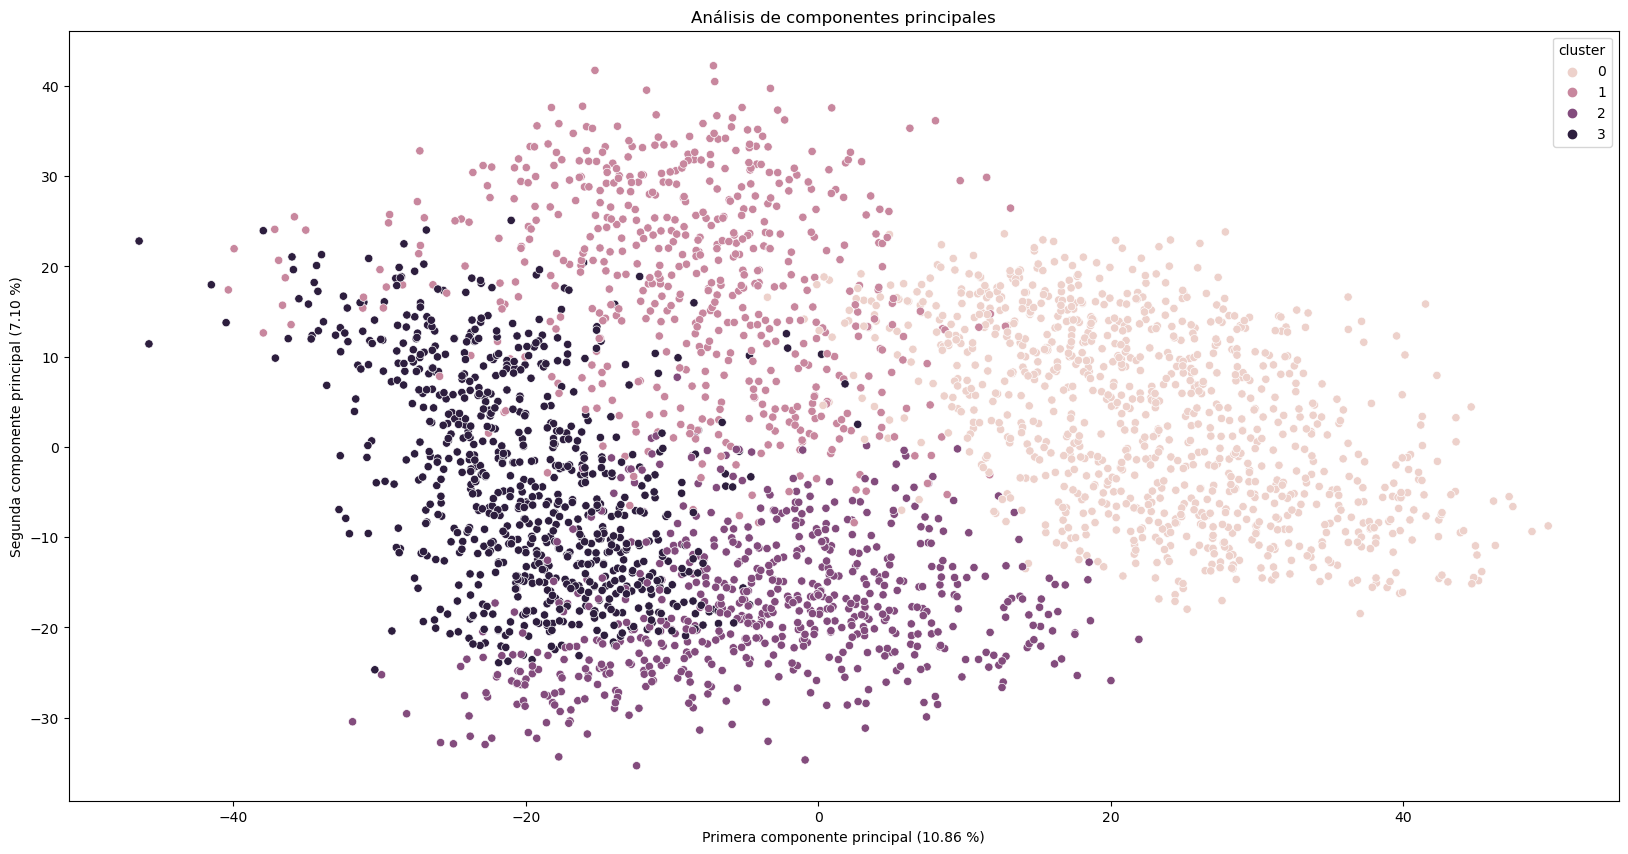

In [218]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="cluster");
plt.title('Análisis de componentes principales')
plt.xlabel('Primera componente principal (%2.2f %%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Segunda componente principal (%2.2f %%)'  % (pca.explained_variance_ratio_[1]*100));